 K-Mean clustering with a higher dimensional data.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

import phik

In [171]:
df=pd.read_csv("Live.csv")

In [172]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [173]:
df=df.drop(['Column1','Column2','Column3','Column4'],axis=1)

'Column1','Column2','Column3','Column4' are empty features in the dataset which are removed.

### 2

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [175]:
print(len(df['status_id'].unique()))
print(len(df['status_type'].unique()))
print(len(df['status_published'].unique()))

6997
4
6913


As seen above, the three features, 'status_id', 'status_published' and 'status_type' are object (string) type whereas other features are numerical.<br>
Also, The feature 'Status_id' have too many unique values which is not useful in clustering model. <br>
In addition, 'ststus_published' is timedate feature which is also not useful for clustering.

### 3

In [176]:
X = df.iloc[:,3:11]
Y = df.iloc[:,1]
df.drop(['status_id','status_published'],axis=1,inplace=True)
df['status_type'] = df['status_type'].astype('category')
df['status_type'].shape

(7050,)

### 4

In [177]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
scaler = MinMaxScaler()
lab = LabelEncoder()

df['stat_type_cat'] = lab.fit_transform(df['status_type'])
df.drop(['status_type'],axis=1,inplace=True)
df_tran = scaler.fit_transform(df) 
df_trans = pd.DataFrame(df_tran,columns = df.columns)
df_trans.head(3)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,stat_type_cat
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1.000000
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.333333
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,1.000000


In [178]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,random_state=0)
model.fit(df_trans)


KMeans(n_clusters=2, random_state=0)

### 5

In [179]:
model.inertia_

237.7572640441956

In [180]:
model.cluster_centers_

array([[3.90710874e-02, 7.54854864e-04, 7.53667113e-04, 3.85438884e-02,
        2.17448568e-03, 2.43721364e-03, 1.20039760e-03, 2.75348016e-03,
        1.45313276e-03, 3.28506857e-01],
       [6.46330441e-02, 2.67028654e-02, 2.93171709e-02, 5.71231462e-02,
        4.71007076e-02, 8.18581889e-03, 9.65207685e-03, 8.04219428e-03,
        7.19501847e-03, 9.54921576e-01]])

In [181]:
model.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [182]:
from collections import Counter
shape=Counter(model.labels_)
print('Sizes:',shape)

Sizes: Counter({0: 4351, 1: 2699})


### 6

In [183]:
#K mean clustering to find optimal clusters
table = [] 
for k in range(1,15):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(df_trans)
    dic={"clusters":k,
    'Inertia':kmean.inertia_}
    table.append(dic)

Text(0, 0.5, 'Inertia')

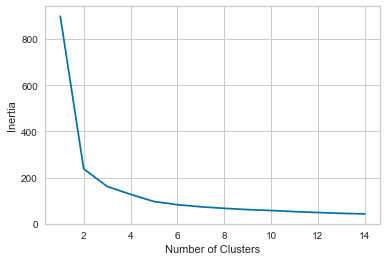

In [184]:
Table=pd.DataFrame(table)
plt.plot(Table.clusters, Table.Inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

### 7

In [185]:
!pip install yellowbrick

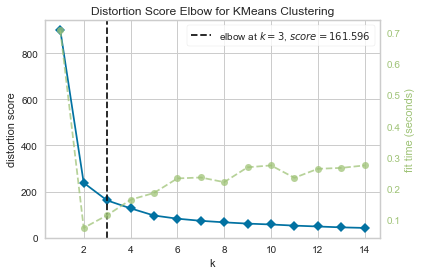

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [186]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(df_trans)        # Fit the data to the visualizer
visualizer.show()       #Finalize and render the diagram

In [187]:
print(f"Optimal number of k:{visualizer.elbow_value_}")

Optimal number of k:3


### 8

In [188]:
model=KMeans(n_clusters=3,random_state=0)
model.fit(df_trans)
model.inertia_

161.59633400033613